# Checkpoint 2
### Due: Tuesday, 7 November, 2023 at 11:00am GMT

### Total points: 100

### Read This First

Wherever you see raise NotImplementedError(), remove that line and put your code there.

Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc.

Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the Kernel menu and select Restart & Run All.

Once you are happy with it, clear the output by selecting Restart & Clear Output from the Kernel menu.

### Your code must not take more than a minute per task.

Submit through Noteable.

# IMPORTANT 

In the following cell you must set the UID variable to be your student matriculation number (UUN), i.e.

`
UID=1769766
`

It must be an integer.

# Do not change it later

It will be used to generate the data that is different from other students



In [1]:
UID = 1838711

# Checking it is integer
assert (type(UID) is int)

# Task 1 (20 points)

The first task is to find the number of local minima of the function. 

The function F() is defined in such a way that it accepts inputs of any number of dimensions. I.e. F([0]), F([0,1]), F([4,2,4,6,2]).

All the minima of the function are  located within -10..10 range. 
I.e. if the location of the minimum is at X=(x_1,x_2,...) then |x_i|<10 for every i.

Your task is to determine the number of local minima of the function for dimensions 1, 2, 3, 4, 5. 
Your code should return the list or array of 5 integer values.

You can assume that the function has no minima separated by less than 0.01.
I.e. if X is location of the local minimum and Y is a different local minimum then ||X-Y|| > 0.01

In [32]:
import numpy as np
import scipy.optimize
import scipy.linalg
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [33]:
T1_D = np.load('checkpoint2_task1.npz')['arr_0']
dims = [1, 2, 3, 4, 5]
import scipy.special as ssp


def blackbox_func(p):
    """
    This is is the function that you need to optimize
    It takes vector arguments (of any length) and a returns a scalar
    DO NOT CHANGE THE CODE INSIDE THIS FUNCTION
    """
    p = np.asarray(p)
    ndim = len(p)
    pos = dims.index(ndim)
    pos = np.random.default_rng(UID).permutation(5)[pos]
    curD = T1_D[1000 * pos:1000 * (pos + 1), :ndim]
    return -ssp.logsumexp(np.sum(-0.5 * ((p[None, :] - curD) / .3)**2, axis=1))


# The function is defined in  1,2,3,4,5 dimensions
print(blackbox_func([0]))
print(blackbox_func([0, 0]))
print(blackbox_func([0, 0, 0]))

-5.061197901905441
16.362522370244495
329.1036916238751


In [38]:
def find_number_of_minima():
    """
    Your function should return the list or array of 5 integers 
    """
    minima_numbers = []
    for dim in dims:
        minima_number = minima_in_each_dim(dim)
        minima_numbers.append(minima_number)
    return minima_numbers

def minima_in_each_dim(dim):
    
    minima_count = 0
    minima_list = []
    
    for i in range(1000):
        initial_guess = np.random.uniform(-10,10,size=dim)
        result = scipy.optimize.minimize(blackbox_func,initial_guess,method ='L-BFGS-B', bounds=[(-10, 10)] * dim)
        
        if result.success:
            unique_sol = all(np.linalg.norm(result.x - x) > 0.01 for x in minima_list)
            if unique_sol:
                minima_list.append(result.x)
                minima_count += 1
    return minima_count
    

In [39]:
my_minima = find_number_of_minima()
assert (len(my_minima) == 5)
print(my_minima)


[3, 5, 2, 3, 4]


# Task 2 (20 pts)

Generate random numbers from a probability distribution that looks like a triangle and a semi-circle.

The PDF f(x) is the following. Use the inverse CDF sampling method.

* f(x) = 0 when x<0
* f(x)= x/2 when 0<x<=1
* f(x)= 1-x/2 when 1<x<=2
* f(x)= 0 when 2<x<=3
* f(x)= $\pi/4 \sin((x-3)\cdot \pi)$ when 3<x<=4
* f(x)= 0 when x>4


Text(0.5, 1.0, 'Plot of the PDF we want to simulate')

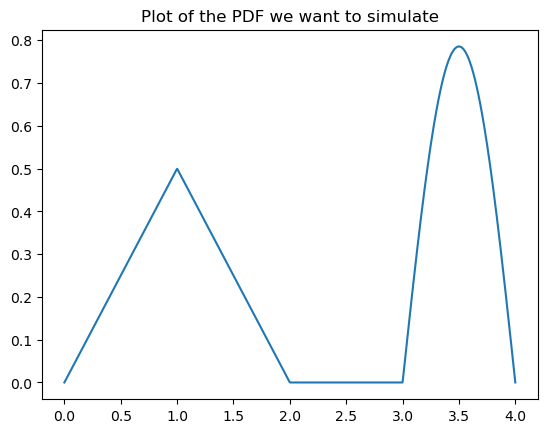

In [40]:
import random

def fpdf(x):
    """ 
    This is the PDF of the distribution we are trying to simulate
    """
    
    y = x*0
    y[(x > 0) & (x <= 1)] = x[(x > 0) & (x <= 1)]/2
    y[(x > 1) & (x <=2 )] = 1 - x[(x > 1) & (x <=2 )]/2
    y[(x > 3) & (x <=4 )] = (np.pi/4)*np.sin((x[(x > 3) & (x <=4 )] - 3)*np.pi)
    
    return y

def generate_triangles(N):
    """ 
    Return a numpy array with N random numbers 
    following the distribution specified
    
    """
    xvalues = []
    xs = 0
    for i in range(N):
        ys = random.random()
        if ys<0.25:
            xs = 2*np.sqrt(ys)
        elif ys<0.5:
            xs = 2 - 2*np.sqrt(0.25 - (ys-0.25))
        else:
            xs = 3 + np.arccos(4*(ys-0.5) - 1)/np.pi
        xvalues.append(xs)
    return xvalues
    
xgrid = np.linspace(0, 4, 1000)
plt.plot(xgrid, fpdf(xgrid))
plt.title('Plot of the PDF we want to simulate')

(array([  20.,   47.,   53.,   70.,  113.,  109.,  120.,  161.,  175.,
         183.,  214.,  223.,  266.,  276.,  340.,  320.,  359.,  359.,
         377.,  384.,  425.,  471.,  478.,  511.,  513.,  512.,  531.,
         561.,  582.,  624.,  589.,  583.,  624.,  686.,  690.,  702.,
         685.,  789.,  762.,  815.,  787.,  844.,  829.,  811.,  887.,
         910.,  933.,  958.,  959.,  949.,  948.,  966., 1013.,  953.,
         872.,  881.,  871.,  839.,  768.,  830.,  823.,  747.,  735.,
         727.,  699.,  681.,  653.,  616.,  645.,  595.,  599.,  559.,
         559.,  528.,  512.,  472.,  446.,  414.,  412.,  378.,  371.,
         355.,  337.,  314.,  319.,  275.,  276.,  257.,  232.,  225.,
         204.,  170.,  158.,  122.,  114.,   94.,   73.,   45.,   39.,
           8.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

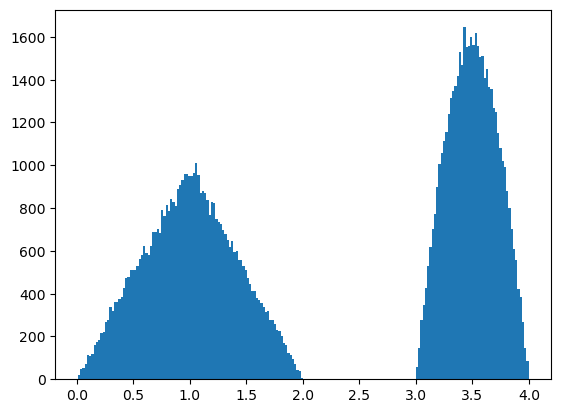

In [41]:
# The code will be tested by this
# the distribution of points should look like a triangle and semicircle
task2_result = generate_triangles(100000)
assert len(task2_result) == 100000
plt.hist(task2_result, bins=200)


# Task 3 (20 pts)

You are conducting an experiment where your parameter of interest x is subject to this equation 
$$ \int_0^x \left( a + sin(b  \ln(c + z^2) +e  z) \right) dz = y  $$


Your experiment provides you with the values of a, b, c, e, y and their uncertainties. 
You need to write the function that computes the value of x (5 points) and it's uncertainty (15 points)
You can assume that 0<x<100 and a>1 and c>0.

We will check the that the value of x is accurate to $0.0001$ and that uncertainty is within 10% of true uncertainty.

In [42]:
def solve_task3(a=None,
                b=None,
                c=None,
                e=None,
                y=None,
                err_a=None,
                err_b=None,
                err_c=None,
                err_e=None,
                err_y=None):
    """
    This function will return two numbers x and its uncertainty given a, b, c, y values 
    and their uncertainties

    """
    N = 1000
    x_estimates = np.zeros(N)
    
    for i in range(N):
        x_estimates[i] = EstimateX(a,b,c,e,y,err_a,err_b,err_c,err_e,err_y) 
    
    x_mean = np.mean(x_estimates)
    x_stdev = np.std(x_estimates,ddof=1)
    x_err = 1.96*(x_stdev / np.sqrt(N))
    result = x_mean, x_err   
    return result


def EstimateX(a,b,c,e,y,err_a,err_b,err_c,err_e,err_y):

    num_samples = 1000
    x_samples = np.random.uniform(0,100,num_samples) 
    y_samples = np.zeros((num_samples),dtype=float)
    a_sample = np.random.normal(a, err_a, size=num_samples)
    b_sample = np.random.normal(b, err_b, size=num_samples)
    c_sample = np.random.normal(c, err_c, size=num_samples)
    e_sample = np.random.normal(e, err_e, size=num_samples)
    y_sample = np.random.normal(y, err_y, size=num_samples)
    
        
    for i in range(num_samples):
        z_sample = np.random.uniform(0, x_samples[i])
        integral_result = scipy.integrate.quad(func, 0, x_samples[i] ,args=(b_sample[i],c_sample[i],z_sample,e_sample[i]))
        y_samples[i] = integral_result[0]
        
    x_estimate = np.mean(x_samples[np.argmin(np.abs(y_samples - y_sample))])
    
    return x_estimate

def func(a_sample, b_sample, c_sample,z_sample, e_sample):
    f = a_sample + np.sin(b_sample * np.log(c_sample + z_sample**2)) + e_sample * z_sample
    return f

In [31]:
testme = solve_task3(
    a=3, b=1, c=0.2, e=0.4, y=5, err_a=0.2, err_b=0.2, err_c=0.02, err_e=0.1, err_y=0.2
)
print(testme)
assert len(testme) == 2

(2.7196044506918153, 0.04778305565496068)


# Task 4 (20 pts)

# Fitting a periodic model to the data. 

In the input data file checkpoint2_task4_file.txt we have repeated measurements from the instrument. 
The file has 3 columns. 

One is the time of observation, the second one is the measurement, and the third one is the uncertainty of the measurement.  We think that the measurements should show periodic changes with time, so we want to fit the dataset by a model with a periodic component:
$$ M(t) = A \sin(2\pi t/T) + B \cos(2\pi t/T) + C t +D $$
A, B, C, D, T are model parameters. We are interested in determining T.

Assuming that we know that the period is between 0.5 and 5, determine the best period describing the data with the accuracy of better than 0.01.

Your function needs to return the pair of  
* the best period and 
* model values of your best fit model corresponding to the measurement times in the input file.

Hint: Notice the model is linear with respect to parameters  A,B,C,D

The grading will be done on another data file you do not have access to.

In [173]:
def solve_period_model(filename):
    """ 
        This function should read the data from the file
        Fit the model and
        return the pair of best-fit period, best-fit model value array 
    """
    DATA = np.loadtxt(filename)
    t, y, ey = DATA
    
    T = np.arange(0.5,5.01,0.01)
    N = len(t)
    
    A = np.zeros((N,4))
    chisqvals = []
    params = []
    
    for i in range(T.size):
        A[:,0] = (np.sin(2*np.pi*t/T[i]))/ey
        A[:,1] = (np.cos(2*np.pi*t/T[i]))/ey
        A[:,2] = t/ey
        A[:,3] = 1/ey
        
        res = scipy.linalg.lstsq(A,y)
        param = res[0]
        chisq = res[1]
        model = A @ param
        params.append(param)
        chisqvals.append(chisq)
        
    # find best T and best parameters
    minimum_val= chisqvals[0]
    for i in range(1, len(chisqvals)): 
        if (chisqvals[i] < minimum_val):
            minimum_val = chisqvals[i]
            
    best_T = T[chisqvals.index(minimum_val)]
    best_params = params[chisqvals.index(minimum_val)]
    
    print(f"BEST PARAMETERS {best_params}")
    bestmod = best_params[0]*np.sin(2*np.pi*t/best_T) + best_params[1]*np.cos(2*np.pi*t/best_T) + best_params[2]*t + best_params[3]
    
    return best_T, bestmod

BEST PARAMETERS [ 0.3192435   0.21717739 -0.01698953  1.29243327]
BEST PERIOD 2.4000000000000017


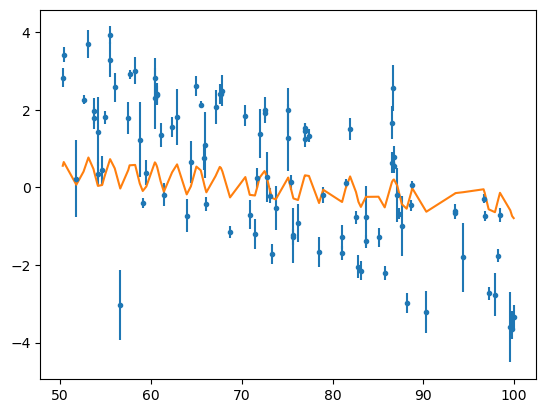

In [174]:
# Your code will be tested like this on the provided data 
# AND on the hidden dataset
bestper, bestmod = solve_period_model('checkpoint2_task4_file.txt')
T4_DATA = np.loadtxt('checkpoint2_task4_file.txt')
plt.errorbar(T4_DATA[0], T4_DATA[1], T4_DATA[2], fmt='.')
print('BEST PERIOD', bestper)
plt.plot(np.sort(T4_DATA[0]), bestmod[np.argsort(T4_DATA[0])])


# Task 5 (20 pts)

You are given a dataset from the particle physics experiment. 
In that experiment the number of particles are recorded in intervals of energy.
The dataset contains an array of those numbers and the central energy of each bin/interval. 
We think that the average number of particles in each bin could be described by this model 

$$R(E) = |A_1|+ 100 \cdot \exp\left(A_2 \cdot \frac{E-70}{100}\right) + |A_3| \cdot  \exp
\left( - \frac{1}{2}\frac{(E-A_4)^2}{A_5^2} \right)$$

where the first two terms are describing the background and the last term is a contribution from a decaying 
particle with the mean energy $A_4$. 

In the dataset you can assume that the number of particles in each bin is described by Poisson distribution with the rate described by the equation above. You can assume that measurements of number of particles in each bin are independent from each other.

Your task is to model the data, estimate the energy of the particle $A_4$ using maximum likelihood approach and estimate the uncertainty of your measurement.

Your function solve_task5() should return two numbers: the estimate of the energy and its uncertainty. 
If you don't know how to estimate the uncertainty, you can return np.nan instead

Your function should also overplot your best model on top of the data.

Hint: Be careful with exponent overflow! (The value of $A_2$ should not be too large!)

We will be testing your code using the same data that you see.

Text(0, 0.5, 'Number of particles')

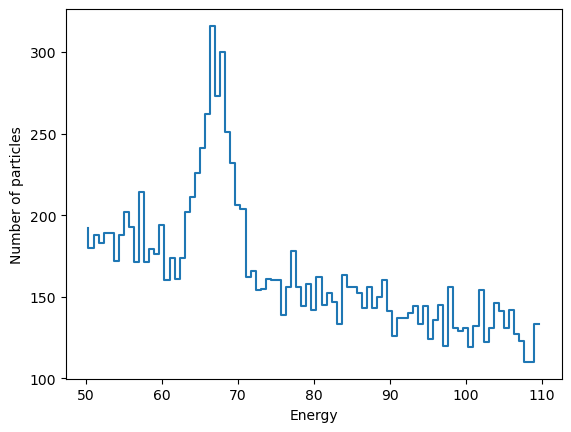

In [42]:
def task5_data_reader(filename):
    # This simply reads the data and return the array of Energies and the number counts in each bin
    # Use this function to read the data
    # DO NOT CHANGE THIS
    D = np.loadtxt('checkpoint2_task5.txt',
                   dtype=[('i', float), ('E', np.float64), ('N', float)])
    i = D['i'].astype(int)
    E, N = D['E'][i == UID % 100], D['N'][i == UID % 100].astype(int)
    return E, N

T5_E, T5_N = task5_data_reader('checkpoint2_task5.txt')
plt.plot(T5_E, T5_N, drawstyle='steps')
plt.xlabel('Energy')
plt.ylabel('Number of particles')

In [102]:
!pip install numdifftools

In [115]:
def solve_task5(filename):
    """
    Your function should return the best value of A4 and its uncertainty. 
    It also should plot the data and overplot your best model on top of the data
    """
    T5_E, T5_N = task5_data_reader(filename)
    initial_guess = [1,1,1,1,1]
    result = scipy.optimize.minimize(like, initial_guess, args=(T5_E, T5_N))   
    params_estimate = result.x
    A4_estimate = params_estimate[3]
    
    plt.plot(T5_E, T5_N, drawstyle='steps', label='Data')
    plt.plot(T5_E, model(T5_E, params_estimate[0],params_estimate[1] ,params_estimate[2] ,params_estimate[3] ,params_estimate[4]), label='Best Model')
    plt.title('Best model overplotting the data')
    plt.xlabel('Energy')
    plt.ylabel('Number of particles')
    plt.legend()
    plt.show()
    print(A4_estimate)
    return A4_estimate, np.nan

def model(E, A1, A2, A3, A4, A5):
    return np.abs(A1) + 100*np.exp(A2*(E-70)/100) + np.abs(A3)*np.exp(-0.5*(E-A4)**2/A5**2)

def like(params, T5_E, T5_N): 
    A1, A2, A3, A4, A5 = params
    expected_rate = model(T5_E, A1, A2, A3, A4, A5)
    P = scipy.stats.poisson(expected_rate)
    logP = np.log(P.pmf(T5_N)).sum()
    
    return -logP 
        

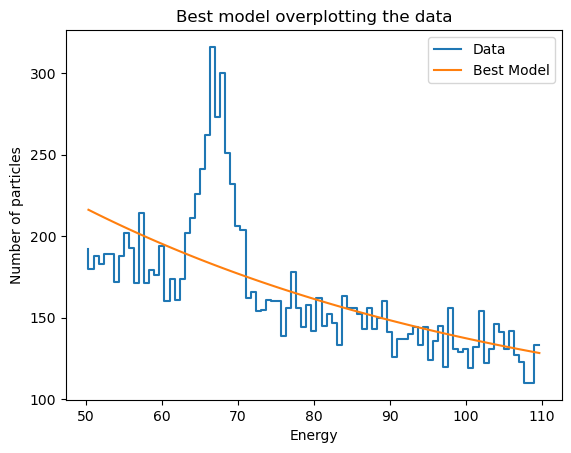

1.0


In [116]:
bestval, besterr = solve_task5('checkpoint2_task5.txt')
